<table align="left">
  <td>
    <a target="_blank" href="https://drive.google.com/file/d/1QLGYZkifoEVkz4V_-ZghvKOwNUBg4fmj/view?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import gdown
import os

## 0. 데이터 불러오기

- 다양한 방법으로 데이터를 불러올 수 있음

In [2]:
# ### Colab을 사용하고 있다면 아래와 같이 데이터를 읽어올 수 있음

# from google.colab import drive
# drive.mount('/content/drive')

# # 파일 경로 설정
# file_path = '/content/drive/MyDrive/Lecture/2024_01/스마트시티_이론과_실제/lecture code/data/HangJeongDong_ver20230101.geojson'

# # 오류를 해결하기 위해 다른 방법으로 파일을 다시 불러옴
# data = gpd.read_file(file_path, driver='GeoJSON')

# # 데이터의 기본 정보 및 첫 몇 줄 확인
# data.info(), data.head()

In [6]:
### Local에서 구동중이라면 아래와 같이 구글 드라이브 데이터를 읽어올 수 있음

# 구글 드라이브 파일 ID (실제 파일의 ID로 교체해야 함)
# 실제 파일 위치 'https://drive.google.com/file/d/1B6yZjG_VUj93yuRiB4iY5uhudb7v-PP5/view?usp=sharing'
file_id = "1B6yZjG_VUj93yuRiB4iY5uhudb7v-PP5"

# 다운로드할 파일 경로
output_path = "HangJeongDong_ver20230101.geojson"

# 파일이 존재하지 않으면 다운로드
if not os.path.exists(output_path):
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, output_path, quiet=False)

# GeoJSON 파일 읽기
data = gpd.read_file(output_path, driver='GeoJSON')

Downloading...
From: https://drive.google.com/uc?id=1B6yZjG_VUj93yuRiB4iY5uhudb7v-PP5
To: g:\내 드라이브\Lecture\2025_01\code_exercise\pop_data_analysis\HangJeongDong_ver20230101.geojson
100%|██████████| 34.9M/34.9M [00:01<00:00, 25.0MB/s]


In [2]:
### Local에서 Local에 있는 데이터를 읽고 싶다면 가장 간단하게 할 수 있음
output_path = './data/HangJeongDong_ver20230101.geojson'

# GeoJSON 파일 읽기
data = gpd.read_file(output_path, driver='GeoJSON')

In [3]:
data

OBJECTID           adm_nm   adm_cd     adm_cd2    sgg sido   sidonm  \
0            1    서울특별시 종로구 사직동  1101053  1111053000  11110   11    서울특별시   
1            2    서울특별시 종로구 삼청동  1101054  1111054000  11110   11    서울특별시   
2            3    서울특별시 종로구 부암동  1101055  1111055000  11110   11    서울특별시   
3            4    서울특별시 종로구 평창동  1101056  1111056000  11110   11    서울특별시   
4            5    서울특별시 종로구 무악동  1101057  1111057000  11110   11    서울특별시   
...        ...              ...      ...         ...    ...  ...      ...   
3511      3456  세종특별자치시 세종시 반곡동  2901075  3611055600  36110   36  세종특별자치시   
3512      3492  세종특별자치시 세종시 새롬동  2901073  3611051500  36110   36  세종특별자치시   
3513      1599     경기도 광주시 오포2동  3125061  4161059000  41610   41      경기도   
3514      1599     경기도 광주시 오포1동  3125060  4161058000  41610   41      경기도   
3515      1599      경기도 광주시 신현동  3125062  4161060000  41610   41      경기도   

          temp sggnm   adm_cd8  \
0      종로구 사직동   종로구  11010530   
1      종로구 삼청동   종로구  11010540   
2      종로구 부암동   종로구  11010550   
3      종로구 평창동   종로구  11010560   
4      종로구 무악동   종로구  11010570   
...        ...   ...       ...   
3511   세종시 반곡동   세종시  29010513   
3512   세종시 새롬동   세종시  29010511   
3513  광주시 오포2동   광주시  31250512   
3514  광주시 오포1동   광주시  31250511   
3515   광주시 신현동   광주시  31250513   

                                               geometry  
0     MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...  
1     MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...  
2     MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...  
3     MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...  
4     MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...  
...                                                 ...  
3511  MULTIPOLYGON (((127.29641 36.54349, 127.30004 ...  
3512  MULTIPOLYGON (((127.23907 36.48808, 127.24342 ...  
3513  MULTIPOLYGON (((127.23876 37.35970, 127.23997 ...  
3514  MULTIPOLYGON (((127.19171 37.34718, 127.19221 ...  
3515  MULTIPOLYGON (((127.18746 37.36485, 127.18707 ...  

[3516 rows x 11 columns]

## 1. 행정경계 데이터 가공

- 읍면동 단위로 되어 있는 행정경계를 시군구 단위로 변환한 후 공간적으로 합침

In [4]:
# 1) 서울, 경기, 인천 지역만 추출
gdf_filtered = data[data['sidonm'].isin(['서울특별시', '경기도', '인천광역시'])].copy()

# 2) sidonm과 sggnm을 붙여서 name이라는 새로운 컬럼 생성
gdf_filtered['name'] = gdf_filtered['sidonm'] + " " + gdf_filtered['sggnm']

# 3) name, sgg 컬럼만 남기기
gdf_final = gdf_filtered[['name', 'sgg','geometry']].copy()

# 데이터 확인
gdf_final

name    sgg                                           geometry
0       서울특별시 종로구  11110  MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...
1       서울특별시 종로구  11110  MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...
2       서울특별시 종로구  11110  MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...
3       서울특별시 종로구  11110  MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...
4       서울특별시 종로구  11110  MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...
...           ...    ...                                                ...
3505  경기도 고양시일산서구  41287  MULTIPOLYGON (((126.77625 37.69403, 126.77598 ...
3506  경기도 고양시일산서구  41287  MULTIPOLYGON (((126.72908 37.68191, 126.72906 ...
3513      경기도 광주시  41610  MULTIPOLYGON (((127.23876 37.35970, 127.23997 ...
3514      경기도 광주시  41610  MULTIPOLYGON (((127.19171 37.34718, 127.19221 ...
3515      경기도 광주시  41610  MULTIPOLYGON (((127.18746 37.36485, 127.18707 ...

[1145 rows x 3 columns]

In [5]:
gdf_final.shape

(1145, 3)

<Axes: >

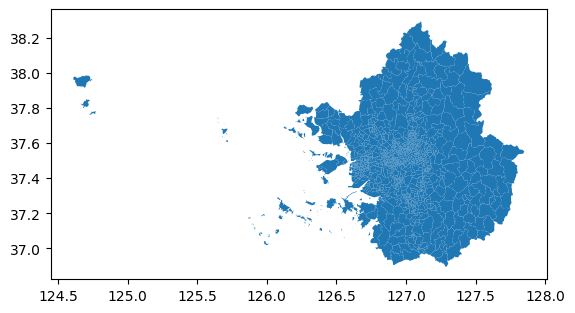

In [6]:
# 매우 간단한 시각화
gdf_final.plot()

In [7]:
# gdf_final을 대화형 지도로 표시
gdf_final

name    sgg                                           geometry
0       서울특별시 종로구  11110  MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...
1       서울특별시 종로구  11110  MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...
2       서울특별시 종로구  11110  MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...
3       서울특별시 종로구  11110  MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...
4       서울특별시 종로구  11110  MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...
...           ...    ...                                                ...
3505  경기도 고양시일산서구  41287  MULTIPOLYGON (((126.77625 37.69403, 126.77598 ...
3506  경기도 고양시일산서구  41287  MULTIPOLYGON (((126.72908 37.68191, 126.72906 ...
3513      경기도 광주시  41610  MULTIPOLYGON (((127.23876 37.35970, 127.23997 ...
3514      경기도 광주시  41610  MULTIPOLYGON (((127.19171 37.34718, 127.19221 ...
3515      경기도 광주시  41610  MULTIPOLYGON (((127.18746 37.36485, 127.18707 ...

[1145 rows x 3 columns]

In [ ]:
# 시군구에 따라 색을 다르게 칠하고 싶으면? 

In [24]:
# sgg 단위로 공간 aggregation 수행
gdf_sgg = gdf_final.dissolve(by='sgg', aggfunc='first')

<Axes: >

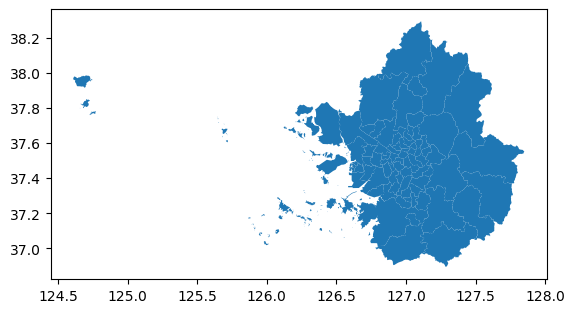

In [25]:
gdf_sgg.plot()

In [ ]:
# Plotly를 사용하여 서울, 경기, 인천 지역의 행정 구역을 나타내는 Choropleth Map 생성
fig = px.choropleth_mapbox(
    gdf_sgg,  # 시군구 GeoDataFrame
    geojson=gdf_sgg.geometry,  # GeoJSON 형식의 지리 정보 (geometry 컬럼 사용)
    locations=gdf_sgg.index,  # 지역 식별자 (DataFrame의 인덱스 사용)
    color_discrete_sequence=['orange'],  # Choropleth 색상 (단일 색상 'orange' 사용)
    mapbox_style='carto-positron',  # Mapbox 스타일 (밝고 단순한 'carto-positron' 스타일 적용)
    zoom=8,  # 초기 지도 확대/축소 수준
    center={'lat': 37.5665, 'lon': 126.9780},  # 초기 지도 중심 좌표 (서울 중심)
    opacity=0.7,  # 지도 레이어 투명도
    hover_name=gdf_sgg.name  # 마우스 오버 시 표시할 정보 (지역 이름)
)

# 지도 레이아웃 업데이트
fig.update_layout(
    margin={'r': 0, 't': 0, 'l': 0, 'b': 0},  # 지도 주변 여백 제거
    mapbox_accesstoken='your_mapbox_access_token'  # Mapbox API 접근 토큰 (본인의 토큰으로 변경 필요!)
)

# 생성된 Plotly Figure 객체 보여주기
fig.show()

In [63]:
# 공간 데이터 간소화
simplified_geometry = gdf_sgg['geometry'].simplify(tolerance=0.01)

gdf_sgg_simplified = gdf_sgg.copy()

# 간소화된 공간 데이터로 'geometry' 컬럼 업데이트
gdf_sgg_simplified.loc[:, 'geometry'] = simplified_geometry

In [ ]:
# Plotly 맵 생성
fig = px.choropleth_mapbox(
    gdf_sgg_simplified,
    geojson=gdf_sgg_simplified.geometry,
    locations=gdf_sgg_simplified.index,
    color_discrete_sequence=['orange'],
    mapbox_style='carto-positron',
    zoom=8,
    center={'lat': 37.5665, 'lon': 126.9780},
    opacity=0.7,
    hover_name=gdf_sgg_simplified.name
)

fig.update_layout(
    margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
    mapbox_accesstoken='your_mapbox_access_token'
)

fig.show()

#### Quiz

Simplify를 할 때, 시군구 경계에서 정합성이 맞지 않는 문제가 발생합니다.  
해당 문제를 구글링해서 다른 사람들도 비슷한 이슈가 있는지 찾아보세요.  
어떻게 해결할 수 있을까요?

- Ask to GPT
- https://github.com/geopandas/geopandas/issues/2402
- https://gis.stackexchange.com/questions/325766/geopandas-simplify-results-in-gaps-between-polygons
- https://mattijn.github.io/topojson/example/settings-tuning.html#toposimplify

### 2. 인구 데이터 매핑

In [57]:
# 인구 정보 데이터 로드
pop_seoul = pd.read_csv('./data/pops/pop_seoul.csv', encoding='EUC-KR')
pop_incheon = pd.read_csv('./data/pops/pop_incheon.csv', encoding='EUC-KR')
pop_gyunggi = pd.read_csv('./data/pops/pop_gyunggi.csv', encoding='EUC-KR')

In [58]:
pop_seoul.columns

Index(['행정구역', '2008년_총인구수', '2008년_세대수', '2008년_남자 인구수', '2008년_여자 인구수',
       '2009년_총인구수', '2009년_세대수', '2009년_남자 인구수', '2009년_여자 인구수', '2010년_총인구수',
       '2010년_세대수', '2010년_남자 인구수', '2010년_여자 인구수', '2011년_총인구수', '2011년_세대수',
       '2011년_남자 인구수', '2011년_여자 인구수', '2012년_총인구수', '2012년_세대수',
       '2012년_남자 인구수', '2012년_여자 인구수', '2013년_총인구수', '2013년_세대수',
       '2013년_남자 인구수', '2013년_여자 인구수', '2014년_총인구수', '2014년_세대수',
       '2014년_남자 인구수', '2014년_여자 인구수', '2015년_총인구수', '2015년_세대수',
       '2015년_남자 인구수', '2015년_여자 인구수', '2016년_총인구수', '2016년_세대수',
       '2016년_남자 인구수', '2016년_여자 인구수', '2017년_총인구수', '2017년_세대수',
       '2017년_남자 인구수', '2017년_여자 인구수', '2018년_총인구수', '2018년_세대수',
       '2018년_남자 인구수', '2018년_여자 인구수', '2019년_총인구수', '2019년_세대수',
       '2019년_남자 인구수', '2019년_여자 인구수', '2020년_총인구수', '2020년_세대수',
       '2020년_남자 인구수', '2020년_여자 인구수', '2021년_총인구수', '2021년_세대수',
       '2021년_남자 인구수', '2021년_여자 인구수', '2022년_총인구수', '2022년_세대수',
       '2022년_남자 인구수', '2022년_여자 인구수', '2

In [59]:
# 데이터 통합
pop_data = pd.concat([pop_seoul, pop_incheon, pop_gyunggi], ignore_index=True)

In [60]:
pop_data

행정구역 2008년_총인구수 2008년_세대수 2008년_남자 인구수  \
0   서울특별시 서울특별시 종로구 (1111000000)    170,705    74,660       85,398   
1    서울특별시 서울특별시 중구 (1114000000)    130,362    58,174       65,110   
2   서울특별시 서울특별시 용산구 (1117000000)    238,224   106,966      116,781   
3   서울특별시 서울특별시 성동구 (1120000000)    314,212   128,658      157,602   
4   서울특별시 서울특별시 광진구 (1121500000)    375,482   155,676      186,237   
..                           ...        ...       ...          ...   
78      경기도 경기도 포천시 (4165000000)    160,176    65,084       83,227   
79      경기도 경기도 여주시 (4167000000)    107,355    41,957       54,210   
80      경기도 경기도 연천군 (4180000000)     45,495    19,255       23,416   
81      경기도 경기도 가평군 (4182000000)     57,108    23,825       29,191   
82      경기도 경기도 양평군 (4183000000)     89,812    38,822       45,412   

   2008년_여자 인구수 2009년_총인구수 2009년_세대수 2009년_남자 인구수 2009년_여자 인구수 2010년_총인구수  \
0        85,307    168,603    74,315       84,257       84,346    170,578   
1        65,252    129,465    58,249       65,025       64,440    132,822   
2       121,443    238,708   107,456      116,954      121,754    244,853   
3       156,610    308,058   126,670      154,333      153,725    309,093   
4       189,245    373,998   156,140      185,190      188,808    375,463   
..          ...        ...       ...          ...          ...        ...   
78       76,949    158,931    65,488       82,815       76,116    158,658   
79       53,145    108,088    43,054       54,478       53,610    109,250   
80       22,079     45,241    19,461       23,304       21,937     45,177   
81       27,917     57,564    24,401       29,475       28,089     58,890   
82       44,400     91,450    39,962       46,331       45,119     95,833   

    ... 2021년_남자 인구수 2021년_여자 인구수 2022년_총인구수 2022년_세대수 2022년_남자 인구수  \
0   ...       70,183       74,500    141,379    72,524       68,395   
1   ...       59,630       62,869    120,437    63,139       58,563   
2   ...      107,210      115,743    218,650   109,805      105,087   
3   ...      139,380      146,610    281,000   133,305      136,633   
4   ...      164,058      175,938    337,416   169,291      162,541   
..  ...          ...          ...        ...       ...          ...   
78  ...       78,915       70,024    146,701    73,438       77,707   
79  ...       57,022       55,128    113,150    53,946       57,567   
80  ...       22,399       20,322     42,062    21,858       22,113   
81  ...       32,129       30,135     62,150    32,140       32,102   
82  ...       60,846       60,384    122,323    59,788       61,495   

   2022년_여자 인구수 2023년_총인구수 2023년_세대수 2023년_남자 인구수 2023년_여자 인구수  
0        72,984    139,417    72,067       67,306       72,111  
1        61,874    121,312    64,714       58,659       62,653  
2       113,563    213,151   107,825      102,312      110,839  
3       144,367    277,361   133,089      134,519      142,842  
4       174,875    335,554   170,077      161,277      174,277  
..          ...        ...       ...          ...          ...  
78       68,994    143,323    72,876       75,837       67,486  
79       55,583    114,412    55,514       58,177       56,235  
80       19,949     41,584    21,943       21,776       19,808  
81       30,048     62,302    32,606       32,137       30,165  
82       60,828    125,238    61,811       62,801       62,437  

[83 rows x 65 columns]

In [61]:
# 연도 컬럼 생성
years = [str(year) + "년_총인구수" for year in range(2008, 2024)]

# 필요한 컬럼만 선택하여 Melt
pop_data_melt = pd.melt(pop_data, id_vars=['행정구역'], value_vars=years, var_name='year', value_name='population')

# 연도 컬럼 정리
pop_data_melt['year'] = pop_data_melt['year'].str[:4].astype(int)

# 행정구역 컬럼 정리 (시군구 코드 추출)
pop_data_melt['sgg_code'] = pop_data_melt['행정구역'].str[-11:-6]

# population 컬럼의 결측값을 0으로 대체
pop_data_melt['population'] = pop_data_melt['population'].fillna('0')

# population 컬럼을 숫자 형태로 변환
pop_data_melt['population'] = pop_data_melt['population'].str.replace(',', '').astype(int)

# 필요 컬럼만 추출
pop_data_melt = pop_data_melt[['year', 'sgg_code','population']]

In [64]:
# sgg_code 컬럼 생성
gdf_sgg_simplified['sgg_code'] = gdf_sgg_simplified.index

# gdf_sgg와 매핑할 수 있도록 sgg_code 컬럼 이름 변경
gdf_sgg_simplified = gdf_sgg_simplified.rename(columns={'sgg': 'sgg_code'})

# gdf_sgg와 pop_data_melt 매핑
gdf_sgg_pop = gdf_sgg_simplified.merge(pop_data_melt, on='sgg_code', how='left')

In [65]:
pop_data_melt

year sgg_code  population
0     2008    11110      170705
1     2008    11140      130362
2     2008    11170      238224
3     2008    11200      314212
4     2008    11215      375482
...    ...      ...         ...
1323  2023    41650      143323
1324  2023    41670      114412
1325  2023    41800       41584
1326  2023    41820       62302
1327  2023    41830      125238

[1328 rows x 3 columns]

In [66]:
gdf_sgg_pop

geometry       name sgg_code  \
0     POLYGON ((126.96730 37.56647, 126.95033 37.618...  서울특별시 종로구    11110   
1     POLYGON ((126.96730 37.56647, 126.95033 37.618...  서울특별시 종로구    11110   
2     POLYGON ((126.96730 37.56647, 126.95033 37.618...  서울특별시 종로구    11110   
3     POLYGON ((126.96730 37.56647, 126.95033 37.618...  서울특별시 종로구    11110   
4     POLYGON ((126.96730 37.56647, 126.95033 37.618...  서울특별시 종로구    11110   
...                                                 ...        ...      ...   
1227  POLYGON ((127.50393 37.43692, 127.47431 37.422...    경기도 양평군    41830   
1228  POLYGON ((127.50393 37.43692, 127.47431 37.422...    경기도 양평군    41830   
1229  POLYGON ((127.50393 37.43692, 127.47431 37.422...    경기도 양평군    41830   
1230  POLYGON ((127.50393 37.43692, 127.47431 37.422...    경기도 양평군    41830   
1231  POLYGON ((127.50393 37.43692, 127.47431 37.422...    경기도 양평군    41830   

      year  population  
0     2008      170705  
1     2009      168603  
2     2010      170578  
3     2011      168382  
4     2012      165207  
...    ...         ...  
1227  2019      116874  
1228  2020      118810  
1229  2021      121230  
1230  2022      122323  
1231  2023      125238  

[1232 rows x 5 columns]

In [67]:
import os
os.getcwd()

'g:\\내 드라이브\\Lecture\\2025_01\\code_exercise\\pop_data_analysis'

### 3. 시군구 단위 연도별 인구변화 시각화

In [68]:
# GeoDataFrame의 인덱스 설정 (여기서는 'sgg_code'를 사용)
gdf_sgg_pop.set_index('sgg_code', inplace=True)

In [ ]:
# Plotly 맵 생성
fig = px.choropleth_mapbox(
    gdf_sgg_pop,
    geojson=gdf_sgg_pop.geometry,
    locations=gdf_sgg_pop.index,
    color='population',
    color_continuous_scale="Viridis",
    mapbox_style='carto-positron',
    zoom=8,
    center={'lat': 37.5665, 'lon': 126.9780},
    opacity=0.7,
    hover_name=gdf_sgg_pop.name,
    animation_frame="year",
)

fig.update_layout(
    margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
    mapbox_accesstoken='your_map_box_token',
    height=800,  # 세로 크기 조정
    width=1200  # 가로 크기 조정
)

fig.show()

In [70]:
# HTML 파일로 저장
fig.write_html("population_map.html")

#### Quiz
1. Mapbox를 사용하면 자유롭게 맵을 커스터마이즈 해서 바꿀 수 있습니다. 본인이 가장 마음에 드는 Basemap을 디자인 해봅시다.

2. 시군구 경계 사이에 공간이 불편합니다. 앞서 풀었던 Quiz를 기반으로 코드를 수정해서 그림을 예쁘게 만들어봅시다. 